<a href="https://colab.research.google.com/github/debojit11/ml_nlp_dl_transformers/blob/main/ML_week_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 7: Support Vector Machines (SVMs)

# **SECTION 1: Welcome & Objectives**

In [1]:
print("Welcome to Week 7!")
print("This week, you'll:")
print("- Understand how Support Vector Machines (SVMs) work")
print("- Learn about decision boundaries and the margin maximization principle")
print("- Compare SVM with previous models like KNN and Logistic Regression")

Welcome to Week 7!
This week, you'll:
- Understand how Support Vector Machines (SVMs) work
- Learn about decision boundaries and the margin maximization principle
- Compare SVM with previous models like KNN and Logistic Regression


# **SECTION 2: Why SVM?**

### Why SVM?
Support Vector Machines are powerful classifiers that find the **optimal boundary** between classes.

They aim to:
- **Maximize the margin** between classes.
- Use only the **most important points** (support vectors).
- Work well even in high-dimensional spaces like text.

➡️ SVMs are like finding the line that best separates your data with the **widest possible gap**.

# **SECTION 3: Reuse SMS Spam Dataset**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', names=["label", "message"])
data['label_num'] = data['label'].map({'ham': 0, 'spam': 1})

In [4]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['message'])
y = data['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧪 Week 7 – Support Vector Machines (SVMs)

---

## 🤔 Why Not Just Use KNN or Logistic Regression?

- KNN is simple, but slow and sensitive to scaling.
- Logistic Regression assumes linear separability.

➡️ What if we could **find the optimal boundary** between classes?

---

## 📍 Enter Support Vector Machines

### 🌟 Core Idea:
- SVM tries to draw the **widest possible margin** between classes.
- It only relies on a few **support vectors** — the most critical points.

> Think of placing a wide street between two groups of people without anyone getting hit — that’s SVM.

---

### ✏️ Margin Intuition

- Decision boundary is based on maximizing the margin between classes.
- `C` controls the **tradeoff** between margin size and misclassification.

---

### ⚙️ Kernels = Feature Expansion

SVMs can also learn **non-linear** patterns using **kernels**:

- `linear`: plain hyperplane
- `rbf`: radial basis — learns curves
- `poly`: polynomial features

---

# **SECTION 4: Train SVM Model**

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [6]:
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [7]:
print("--- SVM (Linear Kernel) ---")
print(classification_report(y_test, y_pred_svm))

--- SVM (Linear Kernel) ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       1.00      0.93      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115



## 📊 Evaluation Toolkit

We again use:
- Confusion matrix
- Precision, Recall, F1
- ROC + AUC

Same toolkit, new classifier!

---

# **SECTION 5: Evaluation – Confusion Matrix & ROC Curve**

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

## Confusion matrix

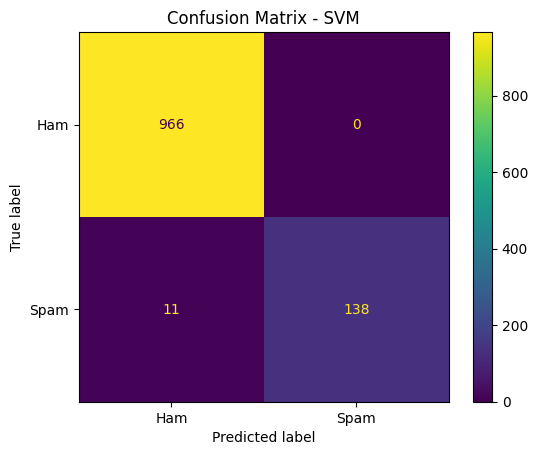

In [9]:
cm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(cm, display_labels=['Ham', 'Spam']).plot()
plt.title("Confusion Matrix - SVM")
plt.show()

## ROC curve

In [10]:
y_probs = svm.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

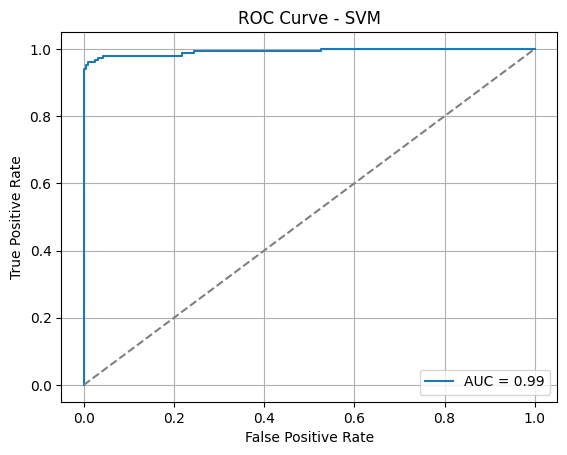

In [11]:
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.grid(True)
plt.show()

### 🧠 TL;DR

| Model        | Strengths                         | Weaknesses                        |
|--------------|----------------------------------|-----------------------------------|
| KNN          | Intuitive, non-parametric        | Slow at test time, sensitive to noise |
| Logistic Reg | Fast, interpretable              | Struggles with complex boundaries |
| SVM          | Great in high dimensions, robust | Needs tuning, can be slow with large data |

---

You now know how SVM finds the **most confident boundaries** by maximizing separation.  
Next week, we dive into **Boosting**, where we combine many weak learners into one strong model ⚡🌲


# **SECTION 6: What’s Coming Next?**

### What’s Next in Week 8?
You've seen how a margin-based classifier like SVM can perform well in high-dimensional spaces.

➡️ Next week, we explore **boosting methods**:  
We’ll learn how **Gradient Boosting** and **XGBoost** build strong models from many weak ones 🌲⚡

# **SECTION 7: Exercises**

### Exercises:
1. Try using different kernels like `'rbf'` or `'poly'` in `SVC`.
2. Change the `C` parameter to see how it affects the margin and performance.
3. Compare `LinearSVC` (faster on large text) with `SVC(kernel='linear')`.
4. Try `CountVectorizer` instead of `TfidfVectorizer`.